### Implementation with Decision Trees

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading a csv file
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [3]:
df.shape

(1093, 9)

In [4]:
# check for null values
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

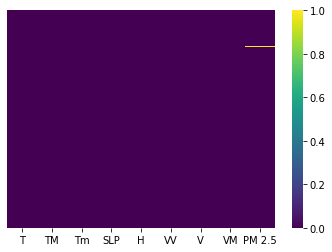

In [5]:
# another way to check null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap='viridis')
# all have same purple color but PM2.5 have yellow color means 
# it has some null values

In [6]:
df.dropna(inplace=True)

In [7]:
X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']] #Independent features
y = df[['PM 2.5']] # dependent featurs

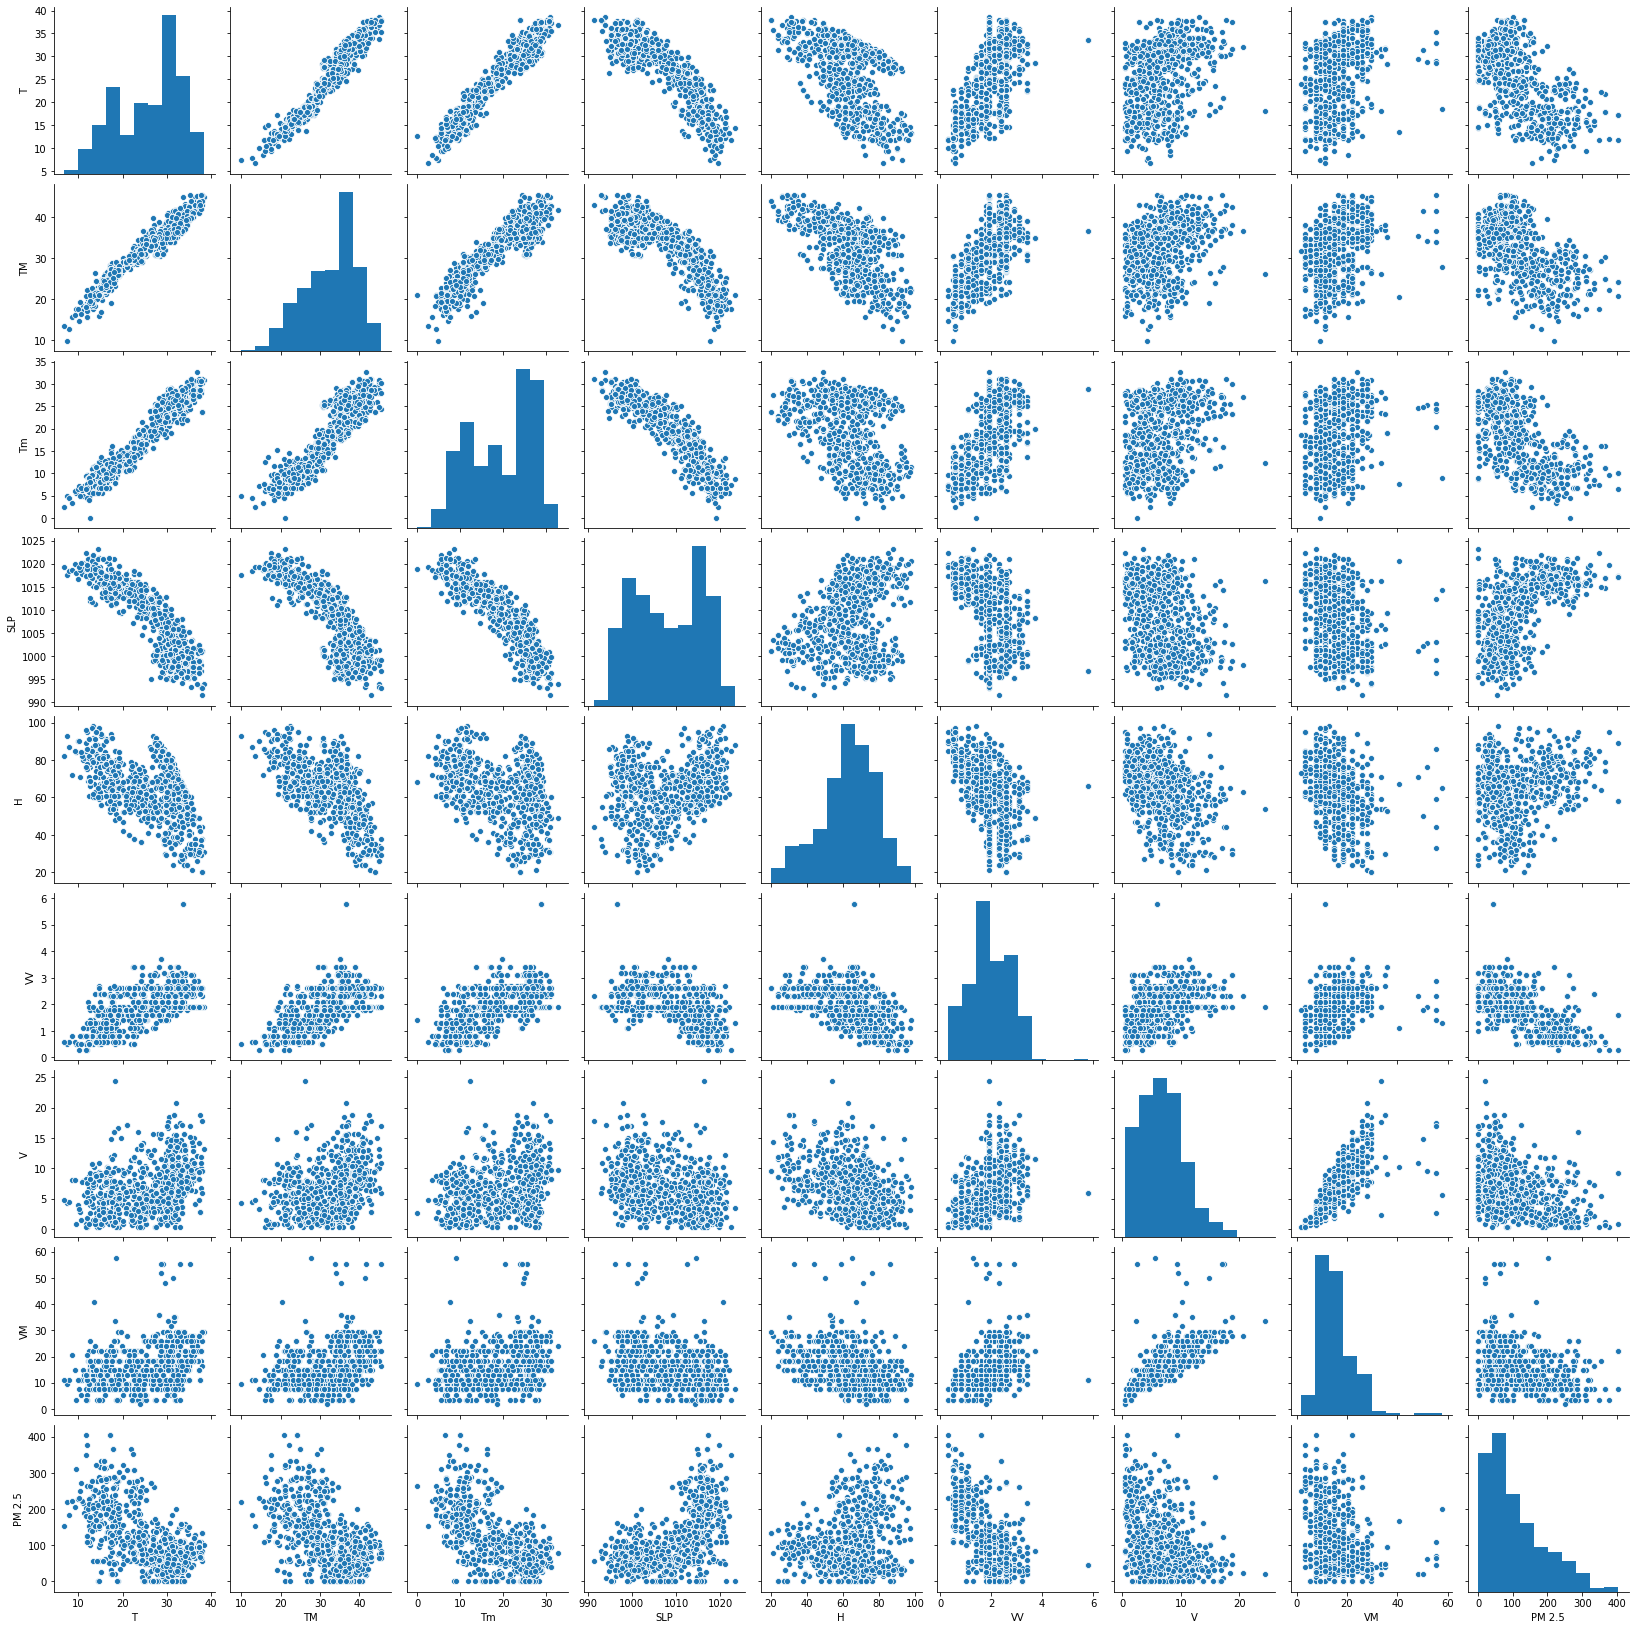

In [8]:
sns.pairplot(df) # way to visualize multiple independent feature with dependent feature

In [9]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

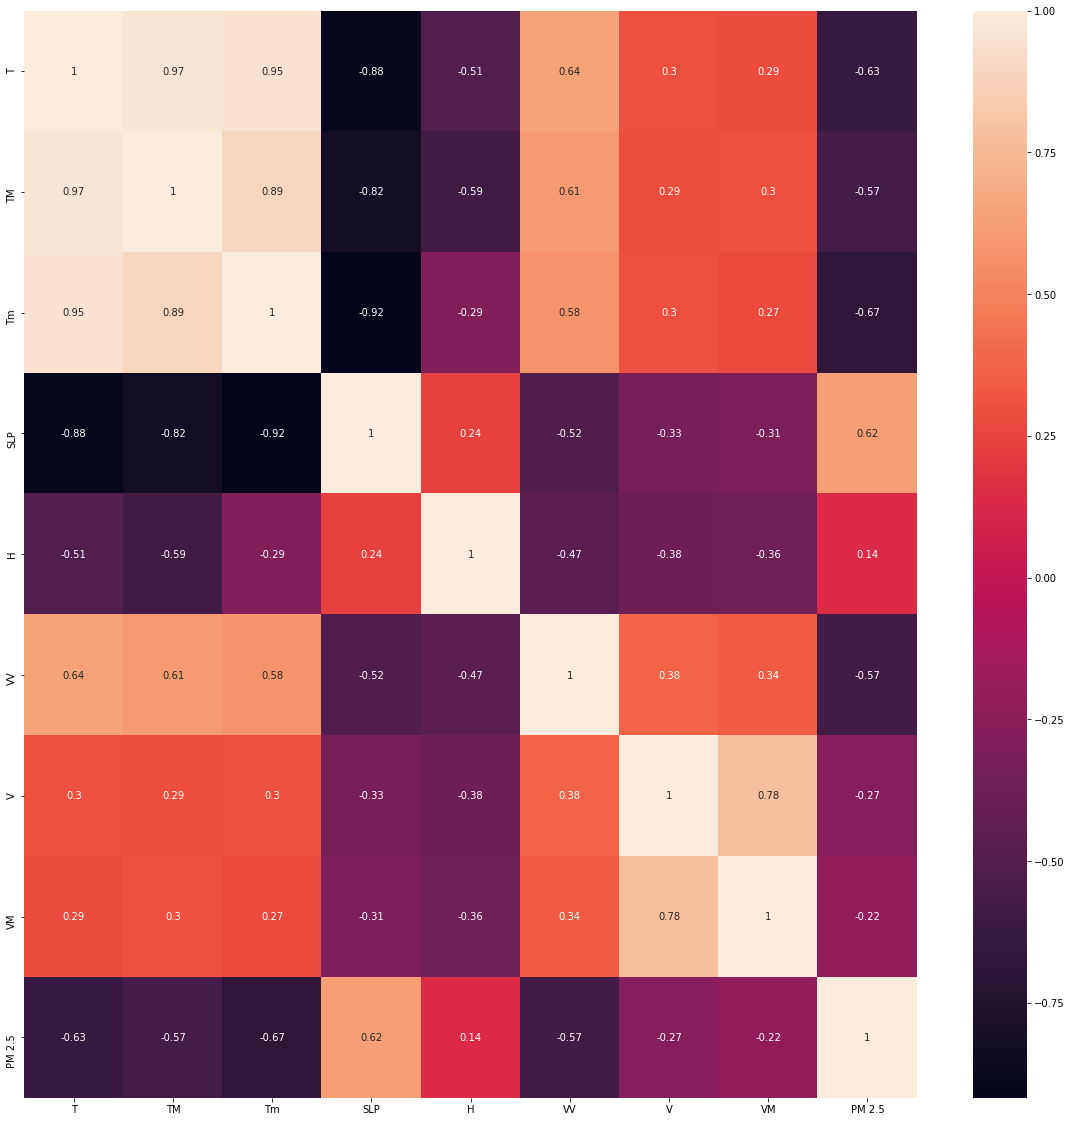

In [10]:
#heatmap to show correlation
corrmat = df.corr()
temp = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[temp].corr(), annot=True)

### Feature Importance 
We use Tree Based Regressor to find the top features for the dataset. It give you the score , higher the score, more relevant is the feature with respect to dependent feature

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor()

In [12]:
print(model.feature_importances_) # feature score for independent features

[0.16430375 0.10313394 0.22605222 0.13701144 0.08549404 0.18643073
 0.05456988 0.04300399]


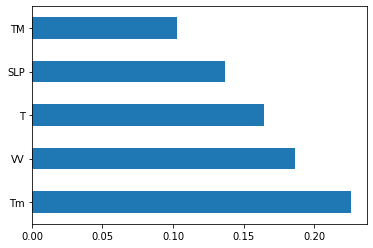

In [13]:
# plot feature scores
feat_score = pd.Series(model.feature_importances_, index = X.columns)
feat_score.nlargest(5).plot(kind= 'barh')
plt.show()

sns.distplot(y)

#### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dec_tree = DecisionTreeRegressor(criterion = 'mse')
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
print("R^2 on train set:", dec_tree.score(X_train, y_train))

R^2 on train set: 1.0


In [20]:
print("R^2 on test set:", dec_tree.score(X_test, y_test))

R^2 on test set: 0.7441518871436774


In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dec_tree, X,y,cv=5)

In [22]:
score.mean()

0.509633736666719

In [26]:
import pydotplus
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [27]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [28]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [30]:
dot_data = StringIO()  
export_graphviz(dec_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.93612 to fit



In [31]:
prediction = dec_tree.predict(X_test)

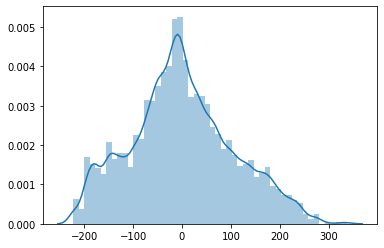

In [58]:
sns.distplot(y_test.to_numpy() - prediction)

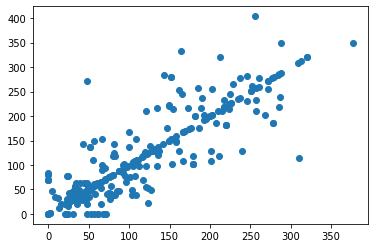

In [38]:
plt.scatter(y_test, prediction)

### Hyperparamter Optimization 

In [39]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [40]:
params = {
    'splitter':['best', 'random'],
    'max_depth':[3,4,5,6,8,10,12,14],
    'min_samples_leaf':[2,3,4,5,6,7],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
    'max_features':['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes':[None, 10,20,30,40,50]
}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
tree_param_search = GridSearchCV(dec_tree,param_grid = params, scoring='neg_mean_squared_error', n_jobs=4, cv=10, verbose=3  ) 

In [45]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [46]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
tree_param_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 11520 candidates, totalling 115200 fits

 Time taken: 0 hours 3 minutes and 47.96 seconds.


In [47]:
tree_param_search.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [48]:
tree_param_search.best_score_

-3131.6489619178874

In [50]:
prediction = tree_param_search.predict(X_test)

In [52]:
y_test

PM 2.5
797   149.583333
1037   30.333333
583     1.791667
731   284.795833
126    30.333333
...          ...
396   133.958333
438    67.458333
160   192.333333
494    60.125000
1084  202.875000

[328 rows x 1 columns]

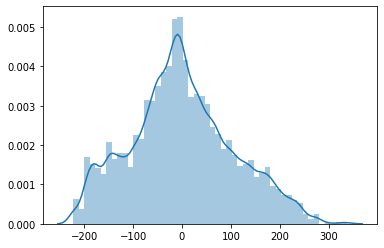

In [56]:
sns.distplot(y_test.to_numpy() - prediction)

In [55]:
prediction.dtype

dtype('float64')

In [60]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 36.33487844401599
MSE: 2475.1466191392674
RMSE: 49.75084541130198


In [63]:
import pickle

In [65]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(tree_param_search, file)